In [120]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [248]:
con_df = pd.read_csv("concrete.csv")
con_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


## 1. Deliverable -1 (Exploratory data quality report reflecting the following)
## a. Univariate analysis

In [9]:
con_df.shape

(1030, 9)

In [11]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [52]:
# dataframe.size 
Size = con_df.size 
  
# dataframe.shape 
Shape = con_df.shape 
  
# dataframe.ndim 
Ndim = con_df.ndim 
  

# printing size and shape 
print("Total Size of the data = {}\nShape of the data ={}\nShape[0] x Shape[1] = {}". 
format(Size, Shape, Shape[0]*Shape[1])) 
  
# printing ndim 
print("Dimensions of dataframe = {}". 
format(Ndim))

Total Size of the data = 9270
Shape of the data =(1030, 9)
Shape[0] x Shape[1] = 9270
Dimensions of dataframe = 2


In [13]:
con_df.describe(include='all').transpose() # central values and other statistical information of attributes

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B465F948D0>,
      dtype=object)

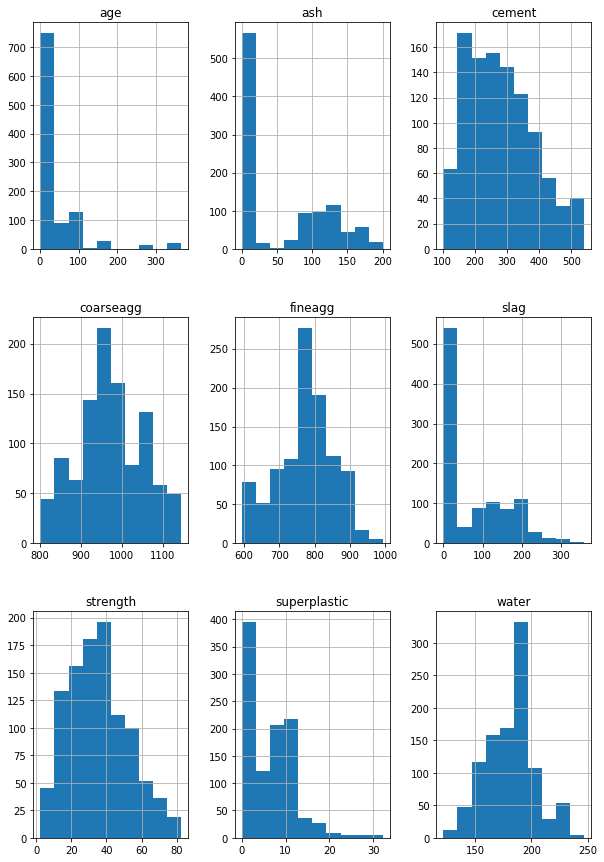

In [15]:
con_df.hist(figsize=(10,15))

##### In ash 50% records (567 records) are having 0 values.
##### In Age 90% (940 records) are having values in range of 1 through 100
##### In Cement Data is right skewed and having right extended tail
##### In coarseagg - Though it shows normal distribution but data seem to be taken from multiple samples and thats why we could see 3 peaks in distribution
##### In fineagg - It is symetrically distributed but it has extended left tail
##### In slag - Around 50% records (567 records) are below 50 and eventually distort the distribution
##### In superplastic - Data is left skewed and 50% datapoints are falling in 25-50% quartile range
##### In Water - Shows close to normal distribution with an additional peak on right tail (shows data fetched from 2 different samples)

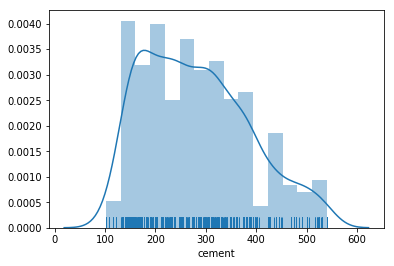

In [17]:
sns.distplot(con_df['cement'], rug= True)

##### Cement feature have long tails in the right side possible outliears
##### There are mixed gaussians her but it is not promiment.

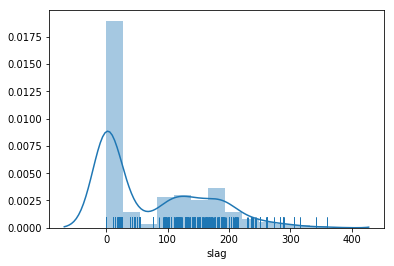

In [18]:
sns.distplot(con_df['slag'], rug= True)

##### slag has many values on the left side of the curve and it have long tails with many outliers.

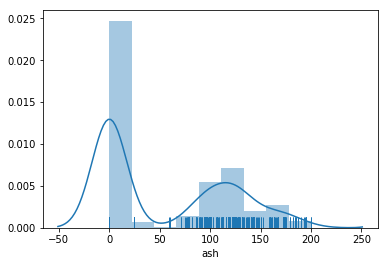

In [19]:
sns.distplot(con_df['ash'], rug= True)

##### Many 0 records here possible missing values.

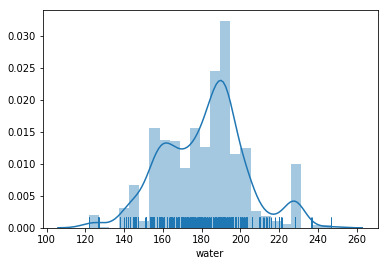

In [21]:
sns.distplot(con_df['water'], rug= True)

##### Multiple gaussians in water feature with few outliears.

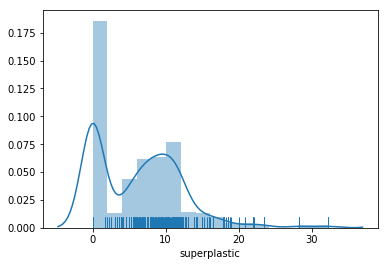

In [22]:
sns.distplot(con_df['superplastic'], rug= True)

##### Many 0 records here possible missing values

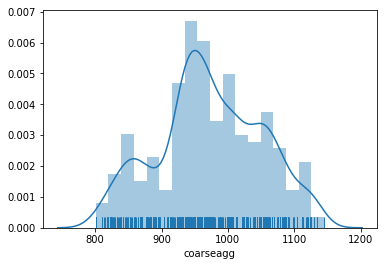

In [23]:
sns.distplot(con_df['coarseagg'], rug= True)

##### Multiple gaussians in coarseagg feature with few outliears.

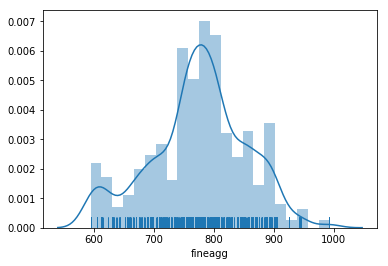

In [24]:
sns.distplot(con_df['fineagg'], rug= True)

##### There are outliers in both sides here.

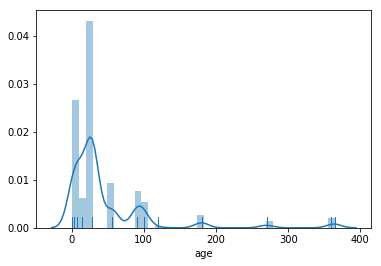

In [25]:
sns.distplot(con_df['age'], rug= True)

##### Age has varibale data from 0 to 300+ and many values are derived from age 0. It may be possible new building data.

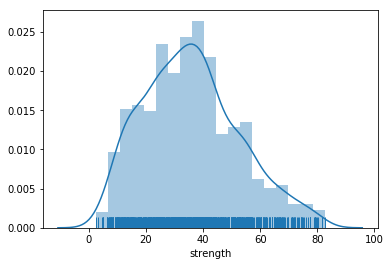

In [67]:
sns.distplot(con_df['strength'], rug= True)

##### The Target column Strength has many data points between 5 to 40 leads to biased feature.

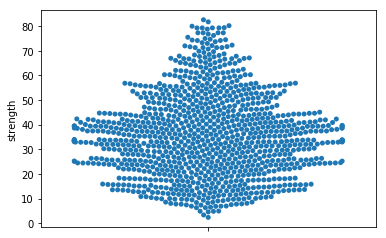

In [29]:
sns.swarmplot(con_df['strength'],orient= "v")

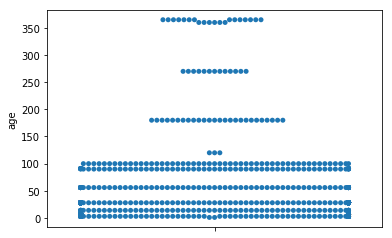

In [30]:
sns.swarmplot(con_df['age'],orient= "v")

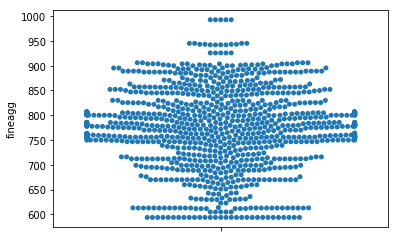

In [31]:
sns.swarmplot(con_df['fineagg'],orient= "v")

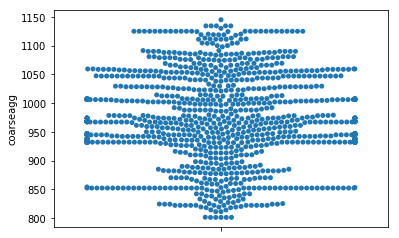

In [32]:
sns.swarmplot(con_df['coarseagg'],orient= "v")

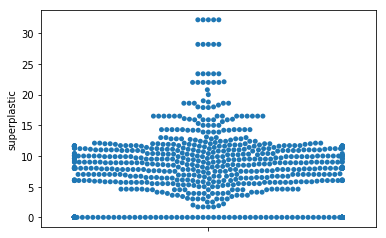

In [33]:
sns.swarmplot(con_df['superplastic'],orient= "v")

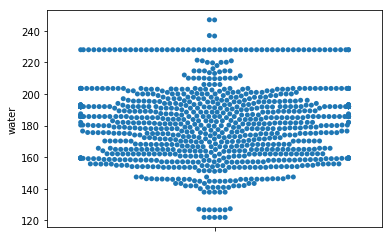

In [34]:
sns.swarmplot(con_df['water'],orient= "v")

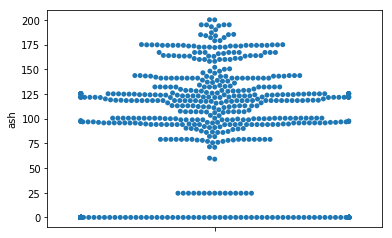

In [35]:
sns.swarmplot(con_df['ash'],orient= "v")

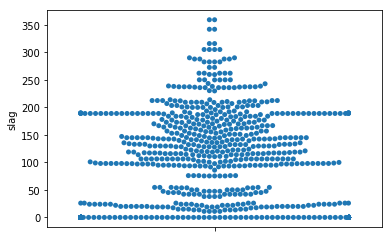

In [36]:
sns.swarmplot(con_df['slag'],orient= "v")

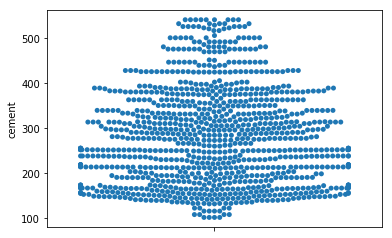

In [37]:
sns.swarmplot(con_df['cement'],orient= "v")

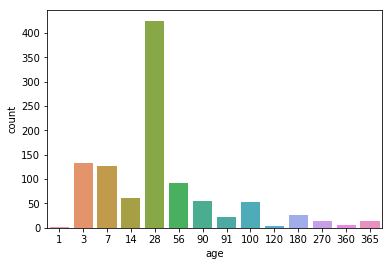

In [38]:
sns.countplot(con_df["age"])

##### Most of the age feature have 28 days of building data.

## b. Multivariate analysis

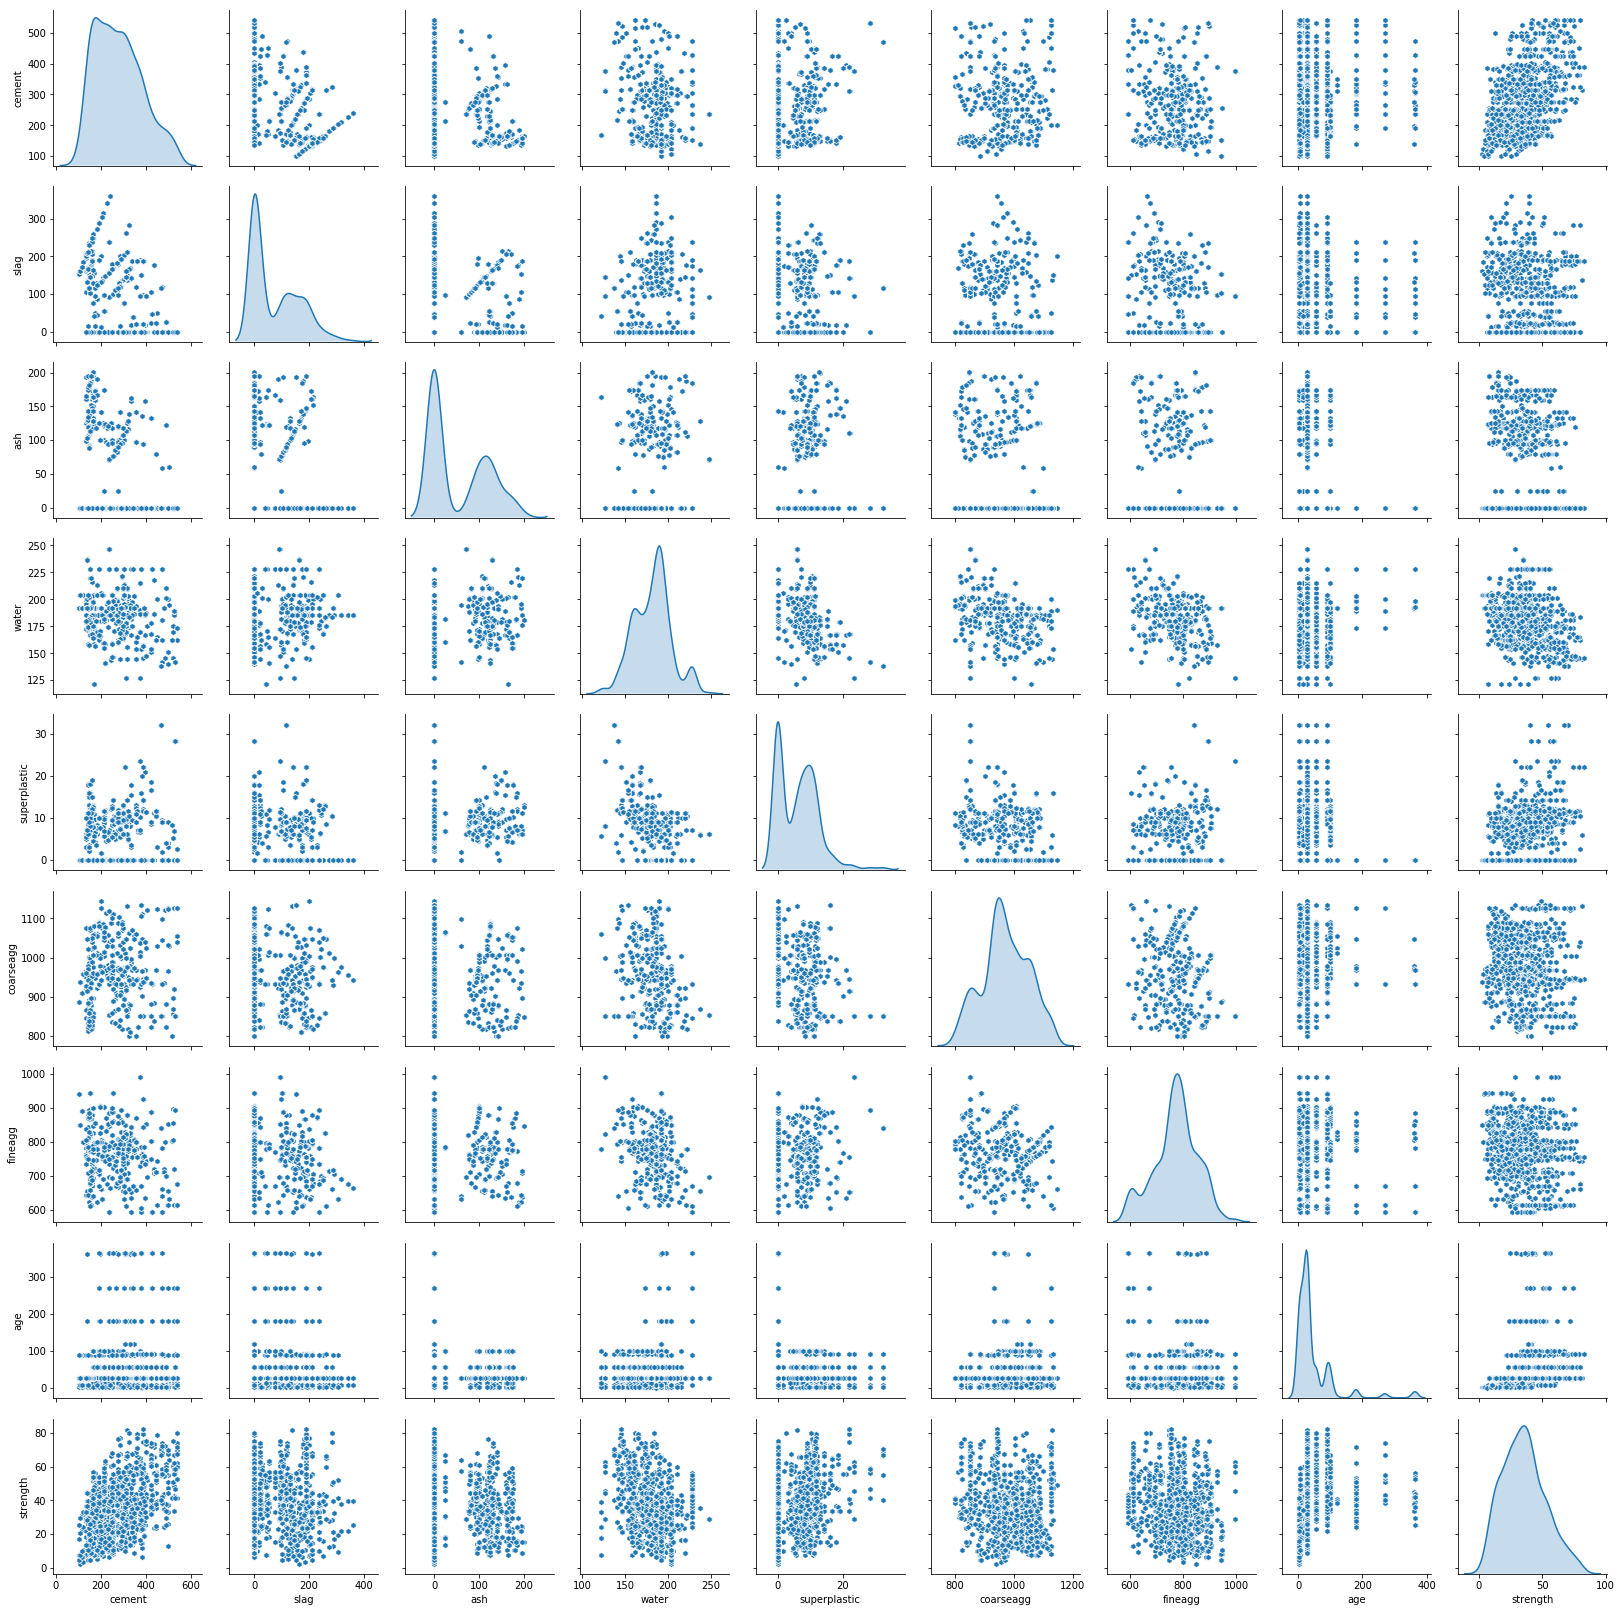

In [40]:
sns.pairplot(data =con_df, diag_kind='kde',markers= 'h')

##### Cement and Strength have positive correlated.

##### Multiple Gaussians are in slag,ash,water,superplastic.

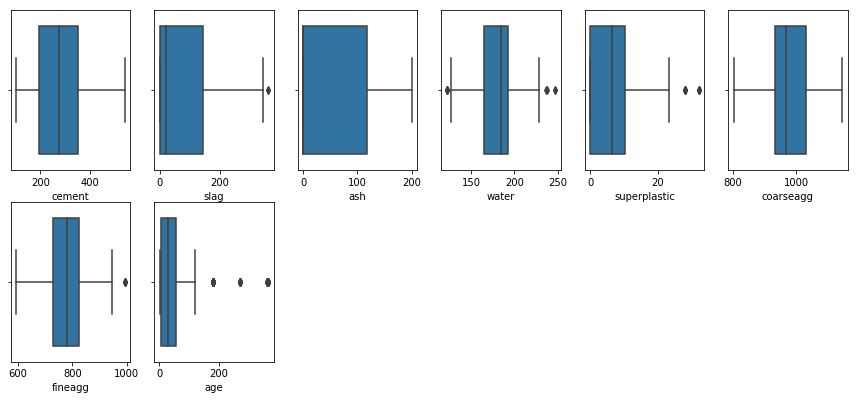

In [43]:
plt.figure(figsize=(15,10))
pos = 1
for i in con_df.drop(columns = 'strength').columns:
    plt.subplot(3, 6, pos)
    sns.boxplot(con_df[i])
    pos += 1 

##### Outliears in the slag,water,superplastic,fineagg & age will be trated with Quartiles.

In [44]:
corr = con_df.corr()
corr

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


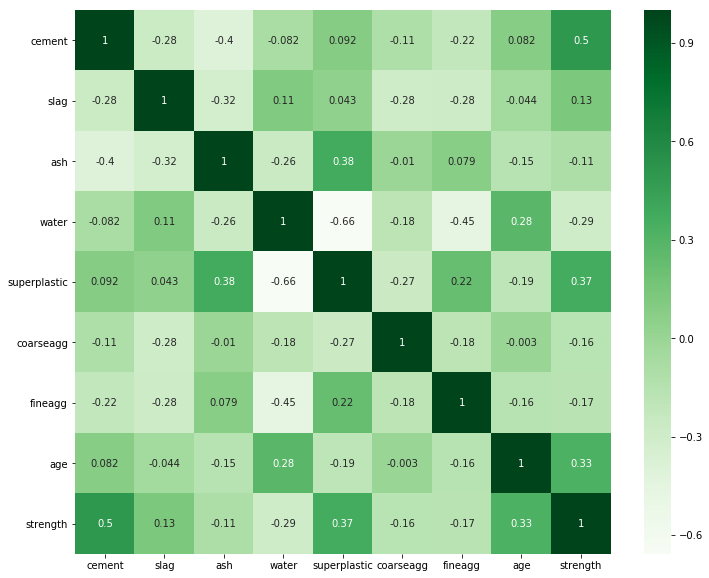

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Greens)
plt.show()

##### From correlation, Cement,Superplast,ash & age have high correllation with trager varible strength

## c. Strategies to address the different data challenges such as data pollution, outliers and missing values

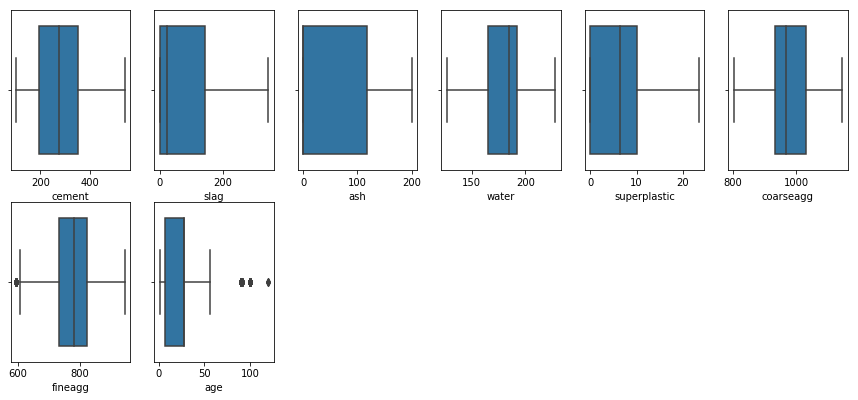

In [249]:
plt.figure(figsize=(15,10))
pos = 1
for i in con_df.drop(columns = 'strength').columns:
    q1, q2, q3 = con_df[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = con_df[i] > q3 + 1.5*IQR
    b = con_df[i] < q1 - 1.5*IQR
    con_df[i] = np.where(a | b, q2, con_df[i]) 
    plt.subplot(3, 6, pos)
    sns.boxplot(con_df[i])
    pos += 1 

##### Outliears of slag,water,superplastic,fineagg & age are trated with Quartiles. Age have few outliers still will be deal with masking.

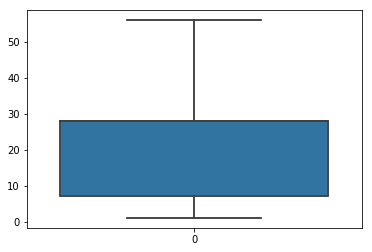

In [69]:
#1,outliers in water
sns.boxplot(data=con_df.age)
con_df["age"] = con_df["age"].mask(con_df["age"] > 60, con_df['age'].median())

# 2 outliers removed
sns.boxplot(data=con_df.age)

##### Age Varibale treated with masking and median.

#### Missing values checking

In [50]:
print("Any missing null values in data set =", con_df.isnull().values.sum())
print("Any missing NA values in data set =", con_df.isna().values.sum())

Any missing null values in data set = 0
Any missing NA values in data set = 0


In [51]:
con_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## 2. Deliverable -2 (Feature Engineering techniques)

In [216]:
# Copy all the predictor variables into X dataframe. 
X = con_df.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = con_df[['strength']]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [31]:
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (721, 8) (721, 1)
Testing dataset shape: (309, 8) (309, 1)


In [36]:
linR = LinearRegression()

In [37]:
# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=5)

In [38]:
# Perform SFFS
sfs1 = sfs1.fit(X_train.values, y_train.values)

In [39]:
sfs1.get_metric_dict()

{1: {'feature_idx': (7,),
  'cv_scores': array([0.37717287, 0.33598903, 0.27816645, 0.20274176, 0.28609133]),
  'avg_score': 0.2960322881032705,
  'feature_names': ('7',),
  'ci_bound': 0.07560628680357176,
  'std_dev': 0.05882425972723707,
  'std_err': 0.029412129863618533},
 2: {'feature_idx': (0, 7),
  'cv_scores': array([0.61077178, 0.56061254, 0.55366015, 0.55829132, 0.56414551]),
  'avg_score': 0.5694962589015984,
  'feature_names': ('0', '7'),
  'ci_bound': 0.026884112854220214,
  'std_dev': 0.02091675314225712,
  'std_err': 0.01045837657112856},
 3: {'feature_idx': (0, 1, 7),
  'cv_scores': array([0.68434037, 0.66368689, 0.57656057, 0.65843802, 0.64933424]),
  'avg_score': 0.6464720161654495,
  'feature_names': ('0', '1', '7'),
  'ci_bound': 0.04729225224180681,
  'std_dev': 0.03679497891737002,
  'std_err': 0.018397489458685006},
 4: {'feature_idx': (0, 1, 3, 7),
  'cv_scores': array([0.73197859, 0.73035664, 0.65735175, 0.70924276, 0.72045997]),
  'avg_score': 0.70987794086733

In [32]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

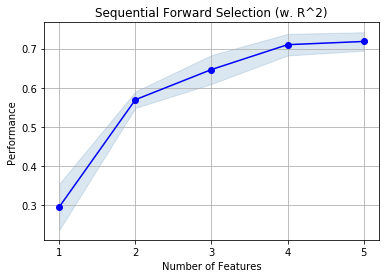

In [40]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [41]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 7]


In [42]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'ash', 'water', 'age']


## 3. Deliverable -3 (create the model )

#### Build full model with selected features

### Linear Regression

In [177]:
linR = LinearRegression()
linR.fit(X_train[subsetColumnList], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
y_train_pred = linR.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(X_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.722


In [179]:
y_test_pred = linR.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(X_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.712


### Decision Tree Regressor

In [82]:
dt_model = DecisionTreeRegressor()

In [318]:
dt_model.fit(X_train[subsetColumnList], y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [320]:
y_train_pred = dt_model.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % dt_model.score(X_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.975


In [321]:
y_test_pred = dt_model.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % dt_model.score(X_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.788


### Random Forest Regressor

In [ ]:
rf =RandomForestRegressor(random_state= 1)

In [43]:
rf.fit(X_train[subsetColumnList], y_train)

D:\DataScience\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\DataScience\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [45]:
y_train_pred = rf.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % rf.score(X_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.956


In [46]:
y_test_pred = rf.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % rf.score(X_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.856


##### Amoung the models RandonmForest tresgressor have better accuracy and Train and test in selected features.

#### Build full model on ALL features, for comparison

### Linear Regression

In [78]:
linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_train_pred = linR.predict(X_train)
print('Training accuracy on all features: %.3f' % linR.score(X_train, y_train))

Training accuracy on all features: 0.723


In [80]:
y_test_pred = linR.predict(X_test)
print('Testing accuracy on all features: %.3f' % linR.score(X_test, y_test))

Testing accuracy on all features: 0.713


### Decision Tree Regressor

In [83]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [84]:
y_train_pred = dt_model.predict(X_test)
print('Training accuracy on all features: %.3f' % dt_model.score(X_test, y_test))

Training accuracy on all features: 0.817


In [85]:
y_test_pred = dt_model.predict(X_train)
print('Testing accuracy on all features: %.3f' % dt_model.score(X_train, y_train))

Testing accuracy on all features: 0.976


### Random Forest Regressor

In [86]:
rf= RandomForestRegressor(random_state= 1)

In [87]:
rf.fit(X_train,y_train)

D:\DataScience\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\DataScience\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [88]:
y_train_pred = rf.predict(X_train)
print('Training accuracy on all features: %.3f' % rf.score(X_train, y_train))

Training accuracy on all features: 0.956


In [89]:
y_test_pred = rf.predict(X_test)
print('Testing accuracy on all features: %.3f' % rf.score(X_test, y_test))

Testing accuracy on all features: 0.859


##### Random Forect perfomed better on both Train and test with entire features.

#### Build full model on ALL features, with scaled.

#### ----------------------------- >Iteration 1 <---------------------------------------------

In [217]:
from sklearn import preprocessing

# scale all the columns. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

### Linear Regression

In [100]:
regression_model = LinearRegression()

In [112]:
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.6784978328351505
The coefficient for slag is 0.3846441219732393
The coefficient for ash is 0.13902724045650455
The coefficient for water is -0.16421006803770805
The coefficient for superplastic is 0.049102854948289816
The coefficient for coarseagg is 0.047710431544947716
The coefficient for fineagg is 0.04228154652225329
The coefficient for age is 0.5185776953745578


In [92]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.008825363154666812


In [113]:
regression_model.score(X_train, y_train)

0.7235047266326935

In [114]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.7116718221401639

#### Linear model have relatively equal accurcay in train and test. But lets explore other regressor models before concluding on Linear

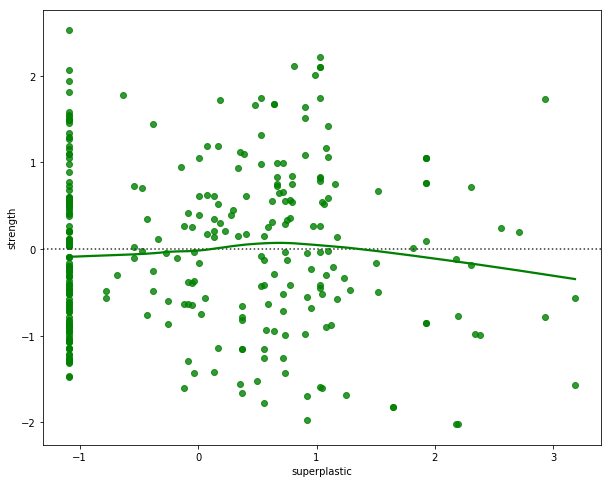

In [118]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['superplastic'], y= y_test['strength'], color='green', lowess=True )


#---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [119]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
185,0.658961,-0.858192,-0.847144,1.036599,-1.091166,0.013910,0.031195,-0.690398,-0.795799
286,0.888723,1.358745,-0.847144,-0.561016,0.753750,-0.602435,-0.201437,0.300203,1.741687
600,-0.039901,-0.858192,-0.847144,0.453882,-1.091166,-0.063294,1.060878,-1.468727,-1.464756
691,0.946164,0.254963,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-1.185698,-0.179544
474,0.716401,-0.858192,1.372788,0.551002,0.918148,-2.212138,0.069332,0.300203,0.302560


In [120]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'strength ~ slag+ash+water+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept      -0.001410
slag           -0.180462
ash            -0.371090
water          -0.581523
superplastic    0.034567
coarseagg      -0.337510
fineagg        -0.470915
age             0.515595
dtype: float64

In [122]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 02 Nov 2019   Prob (F-statistic):          2.20e-155
Time:                        17:56:05   Log-Likelihood:                -643.54
No. Observations:                 721   AIC:                             1303.
Df Residuals:                     713   BIC:                             1340.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0014      0.022     -0.064   

In [123]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [124]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.5486112529939106

In [125]:
# predict Strength for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

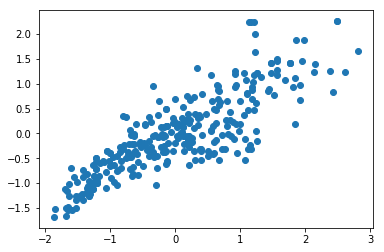

In [126]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test['strength'], y_pred)

### Support Vector Regressor

In [188]:
from sklearn.svm import SVR

In [197]:
# Building a Support Vector Machine on train data
svr_model = SVR(C= .1, kernel='linear', gamma= 1)
svr_model.fit(X_train, y_train)

prediction = svr_model .predict(X_test)

D:\DataScience\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [199]:
# check the accuracy on the training set
print(svr_model.score(X_train, y_train))
print(svr_model.score(X_test, y_test))

0.7167003695894663
0.6977070838083221


#### SVR have less train and test accuracy when compared to linear.

Throws error : Unknown label type: 'continuous'
#KNN    - Unknown label type: 'continuous'

#We are passing floats to a classifier which expects categorical values as the target vector. If we convert it to int it will be accepted as input (although it will be leads to wrong prdictions(in strength attribute (y)) so above algortihms are not implemented.

### Decision Tree Regressor

In [331]:
dt_model = DecisionTreeRegressor()

In [332]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [335]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.352606
slag          0.095404
ash           0.020000
water         0.130981
superplastic  0.020827
coarseagg     0.027992
fineagg       0.038799
age           0.313390


In [333]:
dt_model.score(X_train, y_train)

0.9763104895079818

In [334]:
dt_model.score(X_test, y_test)

0.7807081084261829

#### DTR have over fit in training which have lead to underfit in test.We will continue explore the genralized model with better accuracy.

### Random Forest Regressor

In [53]:
rf = RandomForestRegressor(random_state=1)

In [56]:
rf.fit(X_train, y_train)

D:\DataScience\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\DataScience\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [57]:
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.332007
slag          0.071742
ash           0.026517
water         0.138586
superplastic  0.061169
coarseagg     0.033089
fineagg       0.039143
age           0.297747


In [58]:
rf.score(X_train, y_train)

0.9539446543526967

In [59]:
rf.score(X_test, y_test)

0.8619387450212481

#### RFR have better have score than other models bu t its test accuracy havde reduces, will still look for genralized on both Train and Test.

### Ridge 

In [127]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.6758963   0.38221265  0.13690387 -0.16569144  0.04923731  0.0461622
   0.0402635   0.51834013]]


In [97]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7235034534634629
0.7116224515050278


## Lasso

In [98]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.59486969  0.30273993  0.06222453 -0.19650649  0.05553731  0.
 -0.00544868  0.50919062]


In [99]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7216721823187893
0.7041651910869705


#### Ridge and Lasso has given generalized accuracy on both train and test but will explore further in polinomial whether we can get better accuracies.

#### ---------------------------> Interation 2 <--------------------------------------------------------------

### Polinomial 

In [219]:
from sklearn.preprocessing import PolynomialFeatures

In [220]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [221]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 16)

### Linear Regression

In [222]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 0.          9.86672342  5.51995931 -3.49241043  1.0297552   9.06174905
  0.80703416  0.687138   -0.2991581   0.52331828  1.25852204  0.27923523
  1.80432578 -0.26899214 -0.79451547 -2.64007478]


In [223]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.7469234915903943
0.7251416411356524


### Ridge

In [224]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          9.85959921  5.5141781  -3.48900774  1.03212426  9.05722844
   0.80493113  0.68415848 -0.29903011  0.52323191  1.25575768  0.28058869
   1.80272989 -0.27058069 -0.79354733 -2.63703682]]


In [225]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7469232320655503
0.7250723063654874


### Lasso

In [226]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          9.84743793  5.49107797 -3.48542827  1.02763384  9.05920141
  0.78841821  0.67111983 -0.28169549  0.50693325  1.21522444  0.25948052
  1.79173513 -0.26383082 -0.74668571 -2.58741572]


In [227]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7469121507782921
0.7246769756670755


### Decision Tree Regressor

In [174]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [175]:
dt_model.score(X_train, y_train)

0.9756914081229278

In [176]:
dt_model.score(X_test, y_test)

0.7679355213873009

## Random Forest Regressor

In [94]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)


D:\DataScience\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\DataScience\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [95]:
rf.score(X_train, y_train)

0.953860104777557

In [96]:
rf.score(X_test, y_test)

0.844005000909428

### From Iteration 2, Ridge & Lasso Gives most genralized model with both train (74.6%) and test (72.4%) with elevated accuracy when compared to other regressors with polinomial. 

### PCA

#### This data set have only 9 dimensions  so PCA is not required , but have done it beacuse it was mentioned in Project statement Video.

In [226]:
pca3 = PCA(n_components=5)
pca3.fit(X_scaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(X_scaled)

[[ 0.13778342  0.18907782 -0.45858135  0.53133201 -0.53479322  0.03634914
  -0.37091188 -0.16659552]
 [-0.27632425  0.6914166   0.00460133  0.11141603  0.26098254 -0.56232988
  -0.11297003  0.18990599]
 [ 0.77071002  0.00337907 -0.4002674  -0.28257232  0.26694105 -0.30578878
  -0.0333497  -0.00755247]
 [-0.20018381  0.11024827 -0.29037167 -0.11826978 -0.14665331 -0.19658447
   0.64025709 -0.61594361]
 [-0.08842976  0.43385074 -0.11183872 -0.40119454  0.23367375  0.55187309
  -0.36330805 -0.37326757]]
[0.27397242 0.17755901 0.1621808  0.136349   0.12076353]


In [228]:
cov_matrix = np.cov(con_df, rowvar=False)
np.linalg.eig(cov_matrix)
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_explained)

In [229]:
cum_var_exp

array([0.36159657, 0.63318961, 0.8307461 , 0.94904309, 0.98745801,
       0.99561848, 0.99834921, 0.99973916, 1.        ])

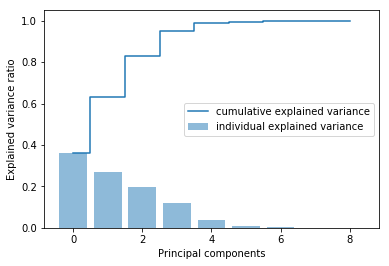

In [230]:
plt.bar(range(0, 9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

### Ridge

In [238]:
ridge = Ridge(alpha=.3)
ridge.fit(Xpca3,y)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-1.77916656  2.68899707  8.47028761 -7.40262423  0.10919413]]


In [239]:
print(ridge.score(Xpca3, y))

0.6103086501233139


### Lasso

In [235]:
lasso = Lasso(alpha=0.01)
lasso.fit(Xpca3,y)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-1.77484049  2.68250852  8.46448165 -7.39543323  0.09887625]


In [236]:
print(lasso.score(Xpca3, y))

0.6103072915863275


### Linear Regression

In [257]:
regression_model = LinearRegression()
regression_model.fit(Xpca3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
regression_model.score(Xpca3, y)

0.6103086842265265

#### We have got very less accuracy on Ridge, Lasso and Linear models so the PCA is not an  optimal option to improve the accuracy in this data set.

### KFold - Cross Validation

In [241]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [255]:
model = LinearRegression()
results = cross_val_score(model, X_poly, y, cv=kfold)

In [256]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[ 0.57781749  0.78889252  0.53536022 -0.05753404  0.80718217  0.57292194
  0.7612051   0.79429593  0.77791345  0.74611078  0.74350093  0.83222494
  0.83741982  0.79156528  0.82455952  0.59767256  0.59733786  0.80039887
  0.85881221  0.83156003  0.89578314  0.37635609  0.83072063  0.58368188
  0.68909701  0.81051422  0.73588399  0.64935827  0.92257767  0.58692113
  0.75240209  0.80349717  0.79979843  0.93144378  0.6468143   0.80374886
  0.58138258  0.60123784  0.69296834  0.85538074  0.75291355  0.61996739
  0.8772595   0.69942286  0.67429701  0.64790759  0.82864395  0.79400829
  0.70822718  0.79865781]
Accuracy: 71.940% (15.870%)


In [275]:
results1 = cross_val_score(ridge, X_poly, y, cv=kfold)

In [276]:
print(results1)
print("Accuracy: %.3f%% (%.3f%%)" % (results1.mean()*100.0, results.std()*100.0))

[ 0.57682706  0.78846134  0.53519625 -0.05729981  0.80712622  0.57299146
  0.76182287  0.79413301  0.77831486  0.74597931  0.74377212  0.83220115
  0.83700852  0.79152564  0.8239814   0.59694486  0.5972064   0.80048744
  0.8590061   0.83134945  0.89567513  0.37661767  0.83097297  0.58354222
  0.68983078  0.810885    0.73666962  0.64951538  0.92290635  0.58843122
  0.75194862  0.80339388  0.79933478  0.93126516  0.64754579  0.80352162
  0.58147933  0.60198921  0.69282138  0.85519814  0.75290485  0.61954418
  0.87705982  0.69923802  0.67592732  0.64838465  0.82864169  0.79401789
  0.70910761  0.79788151]
Accuracy: 71.947% (15.861%)


In [277]:
results2 = cross_val_score(lasso, X_poly, y, cv=kfold)
print(results2)
print("Accuracy: %.3f%% (%.3f%%)" % (results2.mean()*100.0, results.std()*100.0))

[ 0.56723731  0.78834427  0.53146679 -0.0594687   0.81168527  0.57628317
  0.7643911   0.79196947  0.78129623  0.74177886  0.74348838  0.83494262
  0.83382128  0.79196985  0.82001789  0.58980671  0.59592958  0.80322229
  0.86013685  0.83059995  0.89603306  0.37458566  0.83432645  0.58087326
  0.6997777   0.81364077  0.74246783  0.65097317  0.9250094   0.59301506
  0.74692989  0.80336369  0.7963828   0.93016885  0.65260138  0.80117082
  0.58241891  0.60250649  0.69324932  0.85224574  0.75261015  0.61826273
  0.87548598  0.69563381  0.68643579  0.65190737  0.8300011   0.79294194
  0.71328643  0.79262486]
Accuracy: 71.960% (15.861%)


## 4. Deliverable -4 (Tuning the model)

### Pipeline Concept

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [105]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('Lin', LinearRegression()),
    
])

In [295]:
pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Lin',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [296]:
y_predict = pipeline.predict(X)
model_score = pipeline.score(X, y)
print(model_score)

0.7215454434528199


### RandomizedSearchCV

In [159]:
rf = RandomForestRegressor(random_state = 1)

In [160]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [161]:
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [162]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [163]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [164]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [152]:
best_random = rf_random.best_estimator_

In [166]:
best_random.score(X_test , y_test)

0.8722774278376583

### GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [23]:
rf = RandomForestRegressor(random_state = 1)

In [24]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [25]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\DataScience\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

In [26]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 7}

In [27]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.7609586934723744

In [127]:
y_predict = rf.predict(X_test)

In [128]:
#Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, y_predict)
rms = sqrt(mse)

In [129]:
print("The Root Mean Sq Error is {}".format(rms))

The Root Mean Sq Error is 6.738005323712403


In [130]:
r2= r2_score(y_test, y_predict)

In [131]:
print("The R square is",r2)

The R square is 0.844005000909428


#### R2 value of 0.8, for example, means that 80 percent of the variation in the y data is due to variation in the x data